# Arbres de décision dans un contexte de classification

## Human Activity Recognition

Le but de ce projet est de **prédire le type d'activité d'une personne** (variable `Activity`) en fonction de diverses mesures obtenues à l'aide de senseurs. Les différentes activités sont:
- STANDING (être debout)
- SITTING (être assis)
- LAYING (être couché)
- WALKING (marcher)
- WALKING_DOWNSTAIRS (marcher vers le bas)
- WALKING_UPSTAIRS  (marcher vers le haut)

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

## Exercice


### Load Data
1. Loadez les data.<br>
   ```
   train_df = pd.read_csv('./data/HumanActivity/train.csv')
   test_df = pd.read_csv('./data/HumanActivity/test.csv')
   ```


### Data Analysis
2. Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   train_df.duplicated().sum()
   train_df.isna().values.sum()
   ```


3. Visualisez la répartition des valeurs de la variable `Activity` à prédire:<br> 
   ```
   sns.countplot(train_df.Activity, order=train_df.Activity.value_counts().index)
   ```


4. **Principal Component Analysis (PCA)** est une méthode qui réduit la dimension des data selon un critère de maximisation d'explicabilité de leur variance...<br>
   Effectuez une PCA de dimension 2 sur votre train set (sans les colonnes `Activity` et `subject`) et visualisez vos data de dimensions réduites:<br>
   ```
   # PCA
   ...
   pca = PCA(n_components=2, random_state=0).fit_transform(X_train_modified)
   # plot
   ...
   sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=train_df['Activity'])
   ...
   ```
   
   
5. **t-Distributed Stochastic Neighbor Embedding (t-SNE)** est une méthode plus avancée que PCA pour la réduction de dimension, et donc la visualisation des data.<br>
   Effectuez un t-SNE de dimension 2 sur votre train set (sans les colonnes `Activity` et `subject`) et visualisez vos data de dimensions réduites:<br>
      ```
   # t-SNE
   ...
   tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(X_train_modified)
   # plot
   ...
   sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train_df['Activity'])
   ...
   ```

### Data Preprocessing and Splitting
6. Obtenez les **features** `X` et les **targets** `y` à partir de votre dataframe.<br>
    Les **features** corrrespondent à toutes les colonnes sauf `Activity` et `subject`.<br>
    Les **targets** corrrespondent à la colonne `Activity`.<br>
    Utilisez `df.drop(...)`.


7. Dans le cas présent, il n'y a pas besoin de splittez les data en un **train set** et un **test set**, car ceci est déjà effectué...


### Model and Results
8. Instanciez et entraînez un **arbre de décision** `DecisionTreeClassifier` sur vos data:<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions sur le test set


9. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    

    
### Other Models
10. Entraînez également les modèles suivants de `scikit-learn`. Vous pouvez vous référer à la documentation de ces modèles pour plus d'information sur leurs utilisations.<br>
    1. `LogisiticRegression`
    2. `RandomForestClassifier`


### Hyperparameter Tuning
11. Utilisez technique de **grid search** avec **cross validation** pour optimiser les hyperparamètres d'un random forest (prend du temps).<br>
    Faites varier les paramètres du modèle au sein des valeurs suivantes:<br>
    ```
    rf_params = {"max_depth": [3, 5, 8, None],
             "max_features": [3, 5, 10],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 3, 5, 10],
             "bootstrap": [True, False],
             "n_estimators": [100, 500, 1000],
             "random_state": [42]}
    ```
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

## Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
train_df = pd.read_csv('./data/HumanActivity/train.csv')
test_df = pd.read_csv('./data/HumanActivity/test.csv')

In [3]:
train_df.shape, test_df.shape

((7352, 563), (2947, 563))

In [4]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Data Analysis

In [5]:
# check duplicates
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

In [6]:
# check missing values
train_df.isna().values.sum(), test_df.isna().values.sum()

(0, 0)

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


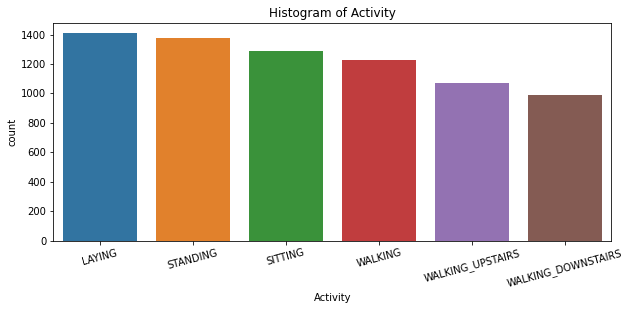

In [7]:
# histogram of activity
plt.figure(figsize=(10, 4))

plt.title('Histogram of Activity')
sns.countplot(train_df.Activity, order=train_df.Activity.value_counts().index)
plt.xticks(rotation = 15)

plt.show()
# the target variable is not imbalanced

In [8]:
# PCA (drop columns 'subject' and 'Activity'
X_pca = train_df.drop(['subject', 'Activity'], axis=1)
pca = PCA(n_components=2, random_state=0).fit_transform(X_pca)

In [9]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

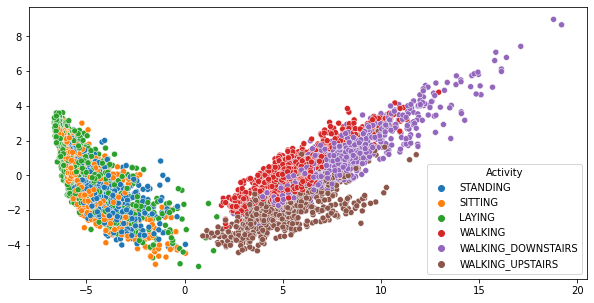

In [10]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=train_df['Activity'])
plt.show()

# We see 2 kinds of activities: static and dynamic

In [11]:
# t-SNE
X_tsne = train_df.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(X_tsne)

In [12]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

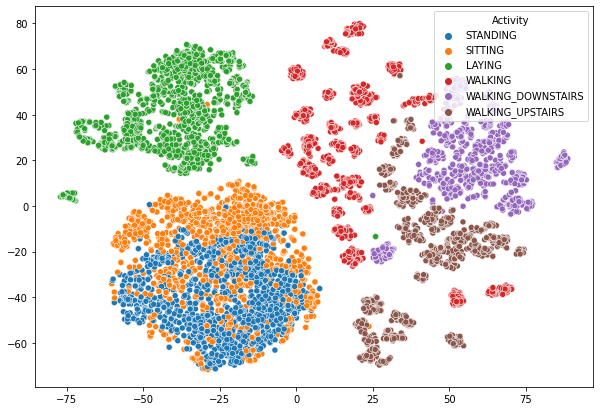

In [13]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train_df['Activity'])
plt.show()

# We see that the activities should be separable
# SITTING and STANDING are probably the most difficult ones to distinguish

## Data Preprocessing and Splitting

In [14]:
# drop columns 'subject' and 'Activity'
X_train = train_df.drop(['subject', 'Activity'], axis=1)
y_train = train_df.Activity

X_test = test_df.drop(['subject', 'Activity'], axis=1)
y_test = test_df.Activity

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

## Model and Results

In [16]:
# 1. instanciate model
dt = DecisionTreeClassifier()
# 2. fit model on the train set
dt.fit(X_train, y_train)
# 3. predict on (the train and) test set
dt_pred = dt.predict(X_test)
# 4. get score
dt_score = dt.score(X_test, y_test)
print('Decision Tree Score: ', dt_score)

Decision Tree Score:  0.8642687478791992


In [17]:
# classification table for the test set
print(classification_report(y_test, dt_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.77      0.80       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.84      0.90      0.87       496
WALKING_DOWNSTAIRS       0.87      0.83      0.85       420
  WALKING_UPSTAIRS       0.82      0.80      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



## Other Models
### Logistic Regression, Random Forest

In [18]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print("Linear Regression Score:\t", lr_score)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Score:\t\t", rf_score)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression Score:	 0.9582626399728538
Random Forest Score:		 0.9273837801153716


In [19]:
# classification table for the test set
print("Logistic Regression")
print(classification_report(y_test, lr_pred))

Logistic Regression
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [20]:
# classification table for the test set
print("Random Forest")
print(classification_report(y_test, rf_pred))

Random Forest
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.91      0.91       491
          STANDING       0.91      0.92      0.92       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.95      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



## Hyperparameter Tuning

In [21]:
# random forest
rf = RandomForestClassifier()
rf_params = {"max_depth": [None],
             "max_features": [3, 5, 10],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 5],
             "bootstrap": [True, False],
             "n_estimators": [50, 100],
             "random_state": [42]}

rf_cv = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None],
                         'max_features': [3, 5, 10], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [42]})

In [22]:
print("Best Parameters:", str(rf_cv.best_params_))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


In [23]:
rf_cv_pred = rf_cv.predict(X_test)

In [24]:
print(classification_report(y_test, rf_cv_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.89      0.92       491
          STANDING       0.91      0.96      0.93       532
           WALKING       0.91      0.96      0.94       496
WALKING_DOWNSTAIRS       0.96      0.84      0.89       420
  WALKING_UPSTAIRS       0.89      0.93      0.91       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.93      0.93      2947



### Save and Load Model

In [25]:
import pickle

# save model
pickle.dump(rf_cv, open('rf_tuned.pkl', 'wb'))

# laod model
rf_cv_2 = pickle.load(open('rf_tuned.pkl', 'rb'))

In [26]:
rf_cv_2.predict(X_test)

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)